In [1]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [7]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex):

    opt_dicts = []
    for i in range(2,4):

        file_regex = resource_regex + "_I_" + str(i) + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## Bacon and Toner Data Analysis

In [8]:
data_path = "../data/bacon_toner_violations/"

eacc_ab_opt_dicts = get_inequality_opt_dicts(data_path, r"eacc_ab")
eaqc_ab_opt_dicts = get_inequality_opt_dicts(data_path, r"eaqc_ab")
qc_ab_opt_dicts = get_inequality_opt_dicts(data_path, r"qc_ab")


4

## Analyzing Data

In [9]:
bt_nonclassicality_witnesses = [
    # (2, np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])),
    # (2, np.array([[1,0,0,0],[0,0,1,0],[1,0,0,1],[0,0,0,1]])),
    (7, np.array([
        [0, 0, 1, 0, 1, 1, 1, 1, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 1, 1, 1],
    ])),
    (13, np.array([
        [1, 2, 0, 2, 1, 2, 0, 2, 1],
        [0, 0, 2, 0, 0, 0, 2, 0, 0],
        [0, 0, 2, 0, 0, 0, 2, 0, 0],
        [1, 2, 0, 2, 1, 2, 0, 2, 1],
    ])),
]


def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(inequalities)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(inequality[1].shape[1]):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]

        max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound) / (qbound - cbound) ]
        

    return max_violations, qbounds, cbounds


qc_ab_max_violations, qbounds, cbounds = analyze_data(qc_ab_opt_dicts, bt_nonclassicality_witnesses)
eacc_ab_max_violations, qbounds, cbounds = analyze_data(eacc_ab_opt_dicts, bt_nonclassicality_witnesses)
eaqc_ab_max_violations, qbounds, cbounds = analyze_data(eaqc_ab_opt_dicts, bt_nonclassicality_witnesses)



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

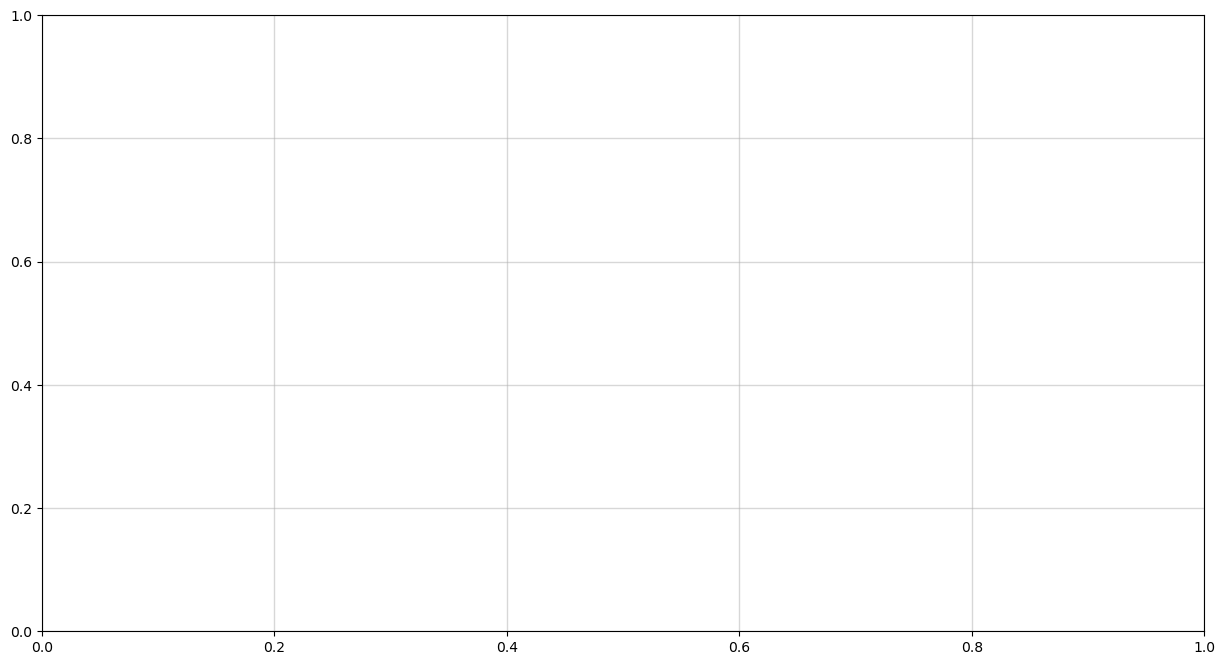

In [11]:
x_axis = np.arange(2)
x_labels = [r"$\mathbf{G}_c^{\rm{BCCV}_4}$", r"$\mathbf{G}_d^{\rm{BCCV}_4}$"]
width = 1/4

fig, ax1 = plt.subplots(figsize=(15, 8), ncols=1,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)


# ax1.bar(x_axis-1*width, qbc_arb_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)

# ax1.bar(x_axis-0*width, eacc_bc_arb_max_violations, width=width, label="EACC", edgecolor="black",linewidth=2)
ax1.bar(x_axis-1*width, qc_ab_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, eacc_ab_max_violations, width=width, label="EACC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eaqc_ab_max_violations, width=width, label="EAQC", edgecolor="black",linewidth=2)




plt.bar(x_axis+0*width, [1]*len(qbounds), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)

plt.figlegend(loc="lower center", ncols = 4, fontsize=24)


ax1.set_xticks(x_axis, x_labels, fontsize=18)#, rotation=60)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Bell Scenarios Asssisted by Auxiliary Communication" + "\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)

plt.show()

In [104]:
mac.rac_game(3)

(18,
 tensor([[1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
          1., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
          0., 1., 1., 1., 0., 1., 1., 1.]], requires_grad=True))